In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as MICE

# Jeorval Cano

In [2]:
fname = 'titanic.csv'

data = pd.read_csv(fname)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. (4.0 pts) Make an Exploratory Data Analysis including:

In [3]:
data.PassengerId = data.PassengerId.astype(str)
data.Pclass = data.Pclass.astype(str)

# General overview

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null object
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print("columns name:")
data.columns

columns name:


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data_shape = data.shape

print('Rows: ',data_shape[0])
print('columns: ', data_shape[1])

Rows:  891
columns:  12


By doing this I noticed that there is a lot of outliers on Age and Cabin variables, that represents two of the 12 variables, and I also noticed is not a large dataset only having 891 registers and the majority of this variables are numeric 

# Univariate analysis

In [8]:
data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891.000000,891,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891,NaN,3,891,2,NaN,NaN,NaN,681,NaN,147,3
top,268,NaN,3,"Norman, Mr. Robert Douglas",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,1,NaN,491,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,0.383838,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,0.486592,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## central tendecies

In [9]:
data.mean()

PassengerId          inf
Survived        0.383838
Pclass               inf
Age            29.699118
SibSp           0.523008
Parch           0.381594
Fare           32.204208
dtype: float64

By getting the mean on survived we get the probability of survived
we can see that the mean of age is almost 30 something, but I feel like the age depends on the class and sex

In [10]:
data.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Abbing, Mr. Anthony",male,24.0,0.0,0.0,1601,8.05,B96 B98,S
1,10,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,C23 C25 C27,NaN
2,100,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,G6,NaN
3,101,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,95,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,96,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,97,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,98,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By getting the mode I can noticed most people died, third class  was the most bought and the most common age was fron 24

In [11]:
data.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

## Dispersion

In [12]:
data.std()

Survived     0.486592
Age         14.526497
SibSp        1.102743
Parch        0.806057
Fare        49.693429
dtype: float64

We can see that age has a large dispersion something that is common beacuse in the travels is normal to have young and old people

In [13]:
# so we can see that 
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

the majority of the varibles are  not so skewed , normal, or are positive skew, but we need to be careful with PassengerID and Pclass because are not numerical values

In [14]:
data.kurtosis()

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

there is only leptokurtic and platikurtic distributions

### Graphics

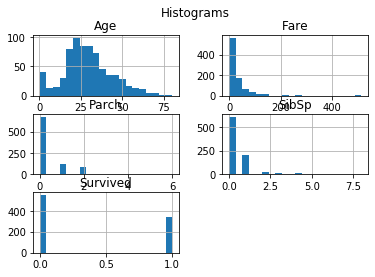

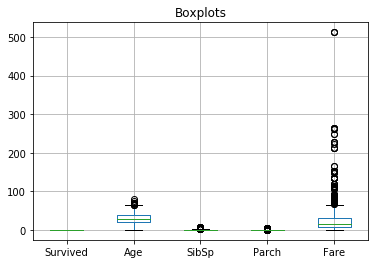

In [15]:
data.hist(bins = 20)
plt.suptitle('Histograms')
plt.show()

data.boxplot()
plt.title('Boxplots')
plt.show()

By doing this we can see that Age and Fare have more outliers

# Multivariate Analysis

In [16]:
covariance_matrix = data.cov()
covariance_matrix

,Survived,Age,SibSp,Parch,Fare
Survived,0.236772,-0.551296,-0.018954,0.032017,6.221787
Age,-0.551296,211.019125,-4.163334,-2.344191,73.849030
SibSp,-0.018954,-4.163334,1.216043,0.368739,8.748734
Parch,0.032017,-2.344191,0.368739,0.649728,8.661052
Fare,6.221787,73.849030,8.748734,8.661052,2469.436846


In [17]:
correlation_matrix = data.corr()
correlation_matrix

,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.077221,-0.035322,0.081629,0.257307
Age,-0.077221,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,0.096067,0.159651,0.216225,1.000000


by doing this is not easy to see the high correlated variables so we need to make a heatmap

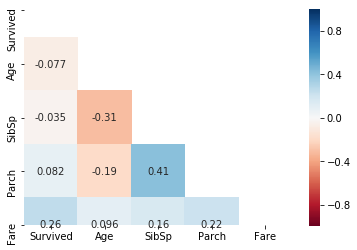

In [18]:
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation_matrix, annot = True, cmap = 'RdBu', square = True, mask = mask, vmin = -1, vmax = 1)
plt.show()
figure = heatmap.get_figure()
figure.savefig("heatmap.png", dpi = 1000)

Doing this we can see that there is no high correlated variables, this could be because can be more related to categorical variables ofr example the age could be more related to the Pclass and Sex

In [29]:
datagroup = data.copy()
datagroup = datagroup.groupby(['Pclass','Sex']).mean()

In [25]:
datagroup.reset_index(drop = False, inplace = True)

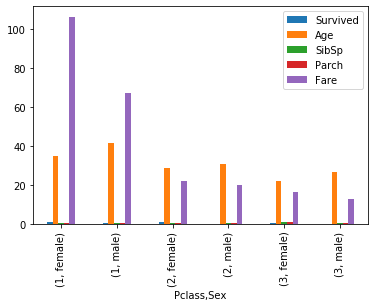

In [32]:
datagroup.plot(kind = 'bar')

By doing this we can see that all the variables are differents depending on this groups, so as a short conclusion the variables are related to the Pclass and Sex, something obvious on the age because at that times rich people used to be the oldest one and have young wives

# Implement three missing imputation method. Include at least one of the following: Linear Regression, K-NN, MICE.

In [33]:
data_imputation = data.copy()

By doing the boxplot I could see outliers so we need to apply median instead of mean on the imputation, it will be apply to Age because it does not have too much NaN values such as Fare and embark is an object so for filling is quite different

In [34]:
data_imputation_median = data_imputation.copy()

In [38]:
data_imputation_median.Age.fillna(data_imputation_median.Age.median(), inplace = True)

In [39]:
data_imputation_median.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there is not more outliers

#### filling by median of groups

In [40]:
data_imputation_median_group = data_imputation.copy()

In [41]:
data_imputation_median_group.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
#filling the na values for the median of the age by Pclass and Sex
data_imputation_median_group.Age.fillna((data_imputation_median_group.groupby(["Pclass","Sex"])["Age"].transform("median")).round(0), inplace = True)

In [45]:
data_imputation_median_group.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### By MICE

In [48]:
MICE_filling = MICE()
columns = ['Age','Survived', 'Pclass']
data_mice = data[columns].copy()
data_mice.iloc[:, :] = MICE_filling.fit_transform(data_mice)

In [49]:
data_mice.isna().sum()

Age         0
Survived    0
Pclass      0
dtype: int64

No more outliers on age

# 3. Perform an Outlier Analysis.

## Using z-score

we are going to look for outliers on the column age, because is a numerical variable and I will get it by using a statistical approach that is Z-score

In [50]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
mean_data = data.Age.mean()
std_data = data.Age.std()

In [53]:
print(mean_data)
print(std_data)

29.69911764705882
14.526497332334042


In [56]:
ageZ = (data.Age - mean_data)/std_data

In [59]:
data.loc[(ageZ >= 3) | (ageZ <= -3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [66]:
print("Number of outliers")
(data.loc[(ageZ >= 3) | (ageZ <= -3)]).shape[0]

Number of outliers


2

# Discretize the passengers based on age. You need to perform the
# following binning techniques:
# a. Equal Width.
# b. Equal Frequency.

### Equal width

In [92]:
data2 = data.copy()

In [69]:
number = data.Age.nunique()

In [71]:
maximum = data.Age.max()
minimum = data.Age.min()

In [73]:
data.Age.min()

0.42

In [72]:
(maximum-minimum)/number

0.9043181818181818

since the width is to shor I will used of 5 on five

In [88]:
bins = [x for x in range(0,81) if x%5 == 0 and x != 0]
labels = ["group"+str(x) for x in range(1,len(bins))]

In [89]:
bins

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

In [90]:
labels

['group1',
 'group2',
 'group3',
 'group4',
 'group5',
 'group6',
 'group7',
 'group8',
 'group9',
 'group10',
 'group11',
 'group12',
 'group13',
 'group14',
 'group15']

In [91]:
pd.cut(data.Age, bins, labels = labels)

0      group4
1      group7
2      group5
3      group6
4      group6
        ...  
886    group5
887    group3
888       NaN
889    group5
890    group6
Name: Age, Length: 891, dtype: category
Categories (15, object): [group1 < group2 < group3 < group4 ... group12 < group13 < group14 < group15]

In [93]:
data['Group of age'] = pd.cut(data.Age, bins, labels = labels)

In [94]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group of age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,group4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,group7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,group5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,group6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,group6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,group5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,group3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,group5


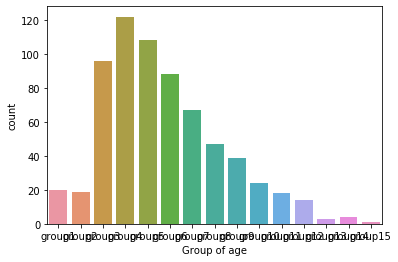

In [100]:
sns.countplot(data['Group of age'])

### Equal frecuency

In [96]:
data.Age.nunique()

88